# Tutorial 3: Baseline, LR with all features (GS)

---

first, let us call the data

In [1]:
%store -r df_input_GS
%store -r y_GS
%store -r df_GS

In [2]:
y_GS = y_GS.map({'S': 1, 'B': 0})

calling some packages

In [3]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [4]:
from sklearn.model_selection import train_test_split

Xtrain_finall, Xtest_finall, Ytrain_finall, Ytest_finall = train_test_split( df_input_GS, y_GS, test_size = 0.3, random_state=3, stratify=y_GS) # train and valid sets

Xtrain, Xtest, Ytrain, Ytest = train_test_split( Xtrain_finall, Ytrain_finall, test_size = 0.3, random_state=3, stratify=Ytrain_finall) # train and valid sets

In [5]:
print(Xtrain.shape)
print(Xtest.shape)

(246, 2074)
(106, 2074)


---

<b><i> training LR </i></b> 

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
# define the hyper-parameters
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

In [8]:
lr = LogisticRegression() #defining the model

In [9]:
models = [[lr, 'lr', 14]]
par = [lr_par]

In [10]:
from source.ml_acc import get_accuracy_ml

In [11]:
num_ml_tools = len(par)
ml_dicts = {}

for m, par in zip(models, par):
    # for s in splits:
    #     X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= s, random_state=1, stratify = y, shuffle = True)
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for i in range(1):
        xtr =  Xtrain
        xte =  Xtest
        results = get_accuracy_ml (m[0], m[2], par, xtr.values, np.array(Ytrain), xte.values, np.array(Ytest)) # to get the accuracies for the ml model

        key = str(m[1])+", all"
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

In [12]:
print(ml_dicts)

{'lr': {'lr, all': {'tot_acc': 0.8392857142857143, 'jack_train': [0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8214285714285714, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8421052631578947, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8214285714285714, 0.8214285714285714, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8214285714285714, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8363636363636363, 0.8392857142857143, 0.8214285714285714, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8214285714285714, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.839285714285

---

<b><i> save the Dict into a file </i></b> 

In [13]:
import json

In [14]:
with open('base_gs_val.txt', 'w') as file:
     file.write(json.dumps(ml_dicts)) # use `json.loads` to do the reverse

---

In [15]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])  

In [16]:
print(arr_all)

[[['lr, all'], [0.8392857142857143], [0.06724895393890572]]]


---

<b><i> showing the coefficient </i></b> 

In [17]:
model = results[3].best_estimator_
arr_coef = model.coef_[0]
arr_coef

array([-7.30588111, -5.23302307, -5.60865565, ..., -4.09647684,
       -6.46530378,  5.95318328])

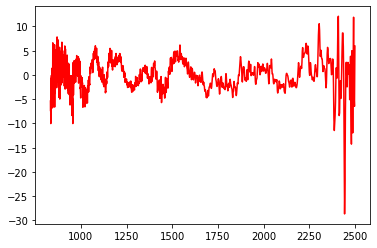

In [18]:
plt.plot(np.array(df_input_GS.columns), arr_coef, color = 'red') # plotting the good apples
plt.show()

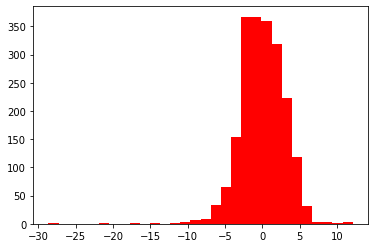

In [19]:
plt.hist(arr_coef, bins = 30, color = 'red') # plotting the good apples
plt.show()